# Clustering Challenge

Clustering is an *unsupervised* machine learning technique in which you train a model to group similar entities into clusters based on their features.

In this exercise, you must separate a dataset consisting of three numeric features (**A**, **B**, and **C**) into clusters. Run the cell below to load the data.

In [1]:
import pandas as pd

data = pd.read_csv('data/clusters.csv')
data.head()

,A,B,C
0,-0.087492,0.398000,0.014275
1,-1.071705,-0.546473,0.072424
2,2.747075,2.012649,3.083964
3,3.217913,2.213772,4.260312
4,-0.607273,0.793914,-0.516091


In [2]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

In [5]:
scaled_features = MinMaxScaler().fit_transform(data)

In [9]:
pca = PCA(n_components= 2).fit(scaled_features)
features_2d = pca.transform(scaled_features)
features_2d[0:10]

array([[ 0.38631524, -0.05515159],
       [ 0.5679739 , -0.06144958],
       [-0.2979762 ,  0.08474023],
       [-0.46052216,  0.11460533],
       [ 0.44134723, -0.16034683],
       [ 0.42096717, -0.06126763],
       [-0.57863184,  0.07164111],
       [-0.14035181,  0.10637315],
       [ 0.47575131,  0.13633551],
       [ 0.57024335,  0.0206122 ]])

Visualise the unclustered data points

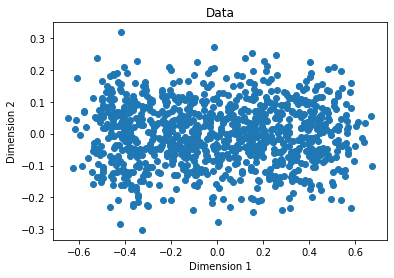

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(features_2d[:,0],features_2d[: ,1])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Data')
plt.show()

Calculate the WCSS for multiple cluster numbers to determine the optimal number of clusters

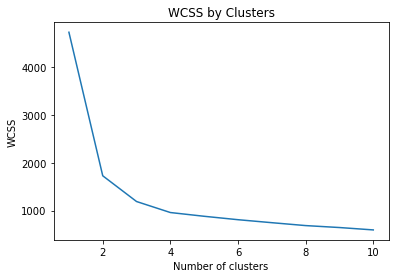

In [19]:
import numpy as np
import matplotlib.pyplot
from sklearn.cluster import KMeans
%matplotlib inline

wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)   
plt.title('WCSS by Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [24]:
from sklearn.cluster import KMeans

# Create a model based on 4 centroids
model = KMeans(n_clusters= 4, init='k-means++', n_init=100, max_iter=1000)
# Fit to the data and predict the cluster assignments for each data point
km_clusters = model.fit_predict(data)
# View the cluster assignments
km_clusters

array([2, 2, 3, 3, 2, 2, 3, 1, 2, 2, 3, 0, 0, 1, 1, 1, 3, 0, 1, 1, 2, 1,
       2, 2, 1, 0, 3, 2, 0, 1, 0, 2, 3, 1, 1, 2, 1, 1, 2, 1, 1, 1, 3, 0,
       3, 2, 2, 3, 3, 1, 2, 0, 3, 3, 3, 3, 1, 2, 3, 2, 2, 2, 2, 2, 1, 1,
       0, 1, 0, 3, 0, 1, 1, 3, 0, 1, 1, 1, 2, 0, 1, 0, 3, 0, 1, 3, 0, 1,
       1, 0, 0, 0, 3, 1, 0, 1, 3, 1, 3, 0, 1, 0, 3, 0, 1, 0, 3, 1, 1, 3,
       1, 0, 2, 2, 0, 3, 0, 3, 2, 0, 1, 0, 3, 3, 2, 1, 0, 1, 3, 2, 0, 0,
       0, 1, 0, 0, 1, 2, 1, 0, 2, 0, 0, 2, 3, 3, 1, 3, 1, 1, 3, 2, 2, 1,
       2, 0, 2, 1, 1, 1, 0, 2, 3, 3, 1, 0, 0, 2, 2, 3, 2, 0, 1, 3, 1, 0,
       0, 1, 1, 2, 1, 2, 0, 0, 1, 3, 2, 3, 3, 0, 0, 2, 0, 1, 3, 0, 1, 1,
       2, 3, 0, 3, 3, 3, 2, 2, 3, 1, 3, 2, 3, 3, 0, 2, 3, 1, 1, 3, 2, 3,
       1, 2, 0, 3, 0, 1, 0, 2, 0, 2, 1, 2, 0, 1, 2, 3, 3, 2, 3, 0, 3, 0,
       3, 1, 1, 0, 3, 2, 2, 1, 3, 1, 0, 0, 3, 3, 3, 2, 3, 2, 1, 3, 3, 1,
       2, 1, 0, 0, 0, 1, 3, 2, 1, 0, 2, 0, 3, 1, 1, 2, 3, 3, 0, 2, 2, 3,
       3, 0, 3, 2, 2, 0, 2, 3, 3, 3, 1, 1, 0, 2, 3,

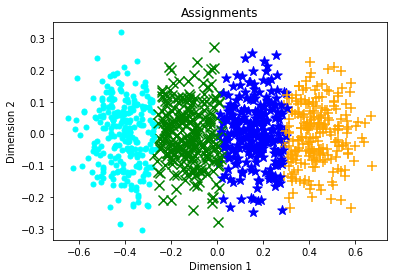

In [25]:
def plot_clusters(samples, clusters):
    col_dic = {0:'blue',1:'green',2:'orange', 3:'cyan'}
    mrk_dic = {0:'*',1:'x',2:'+', 3:'.'}
    colors = [col_dic[x] for x in clusters]
    markers = [mrk_dic[x] for x in clusters]
    for sample in range(len(clusters)):
        plt.scatter(samples[sample][0], samples[sample][1], color = colors[sample], marker=markers[sample], s=100)
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.title('Assignments')
    plt.show()

plot_clusters(features_2d, km_clusters)

AGGLOMERATIVE CLUSTERING

In [26]:
from sklearn.cluster import AgglomerativeClustering

agg_model = AgglomerativeClustering(n_clusters=3)
agg_clusters = agg_model.fit_predict(data)
agg_clusters

array([1, 1, 0, 2, 1, 1, 2, 0, 1, 1, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 2, 1, 1, 0, 0, 1, 2, 0, 0, 1, 0, 0, 1, 0, 0, 0, 2, 0,
       2, 1, 1, 2, 2, 0, 1, 0, 0, 2, 2, 2, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2,
       0, 0, 1, 1, 0, 2, 0, 2, 1, 0, 0, 0, 2, 0, 1, 0, 0, 0, 2, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 2, 2, 0, 2, 0, 0, 2, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 2, 2, 0, 0, 0, 1, 1, 2, 1, 0, 0, 2, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 2, 1, 0, 2, 0, 0, 1, 0, 0, 2, 0, 0, 0,
       1, 2, 0, 2, 2, 2, 1, 1, 0, 0, 2, 1, 2, 0, 0, 1, 2, 0, 0, 2, 1, 2,
       0, 1, 1, 2, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 2, 2, 1, 0, 0, 0, 0,
       2, 0, 0, 1, 2, 1, 1, 0, 2, 0, 0, 1, 2, 2, 2, 1, 2, 1, 0, 2, 0, 0,
       1, 0, 0, 1, 0, 0, 2, 1, 0, 0, 1, 0, 2, 0, 0, 1, 2, 2, 0, 1, 1, 2,
       2, 0, 2, 1, 1, 0, 1, 0, 2, 2, 0, 0, 0, 1, 0,

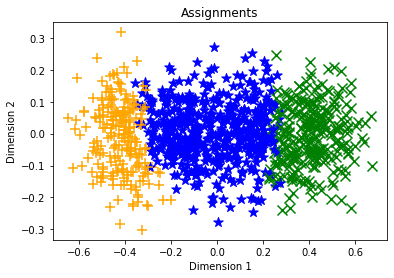

In [27]:
import matplotlib.pyplot as plt

%matplotlib inline

def plot_clusters(samples, clusters):
    col_dic = {0:'blue',1:'green',2:'orange'}
    mrk_dic = {0:'*',1:'x',2:'+'}
    colors = [col_dic[x] for x in clusters]
    markers = [mrk_dic[x] for x in clusters]
    for sample in range(len(clusters)):
        plt.scatter(samples[sample][0], samples[sample][1], color = colors[sample], marker=markers[sample], s=100)
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.title('Assignments')
    plt.show()

plot_clusters(features_2d, agg_clusters)
